![Py4Eng](img/logo.png)

# TensorFlow
## Yoav Ram

# TensorFlow

[TensorFlow™](https://www.tensorflow.org/) is an **open source** software library for **numerical computation** using **data flow graphs**. **Nodes** in the graph represent **mathematical operations**, while the graph **edges** represent the multidimensional **data arrays** (tensors) communicated between them. 

The flexible architecture allows you to **deploy** computation to one or more **CPUs** or **GPUs** in a **desktop, server, or mobile device** (or cluster, since [v0.8](http://googleresearch.blogspot.co.il/2016/04/announcing-tensorflow-08-now-with.html) Apr 13, 2016) with a single API. 

TensorFlow was originally developed by researchers and engineers working on the **Google Brain Team** within **Google's Machine Intelligence research organization** for the purposes of conducting **machine learning and deep neural networks research**, but the system is general enough to be applicable in a wide variety of other domains as well.

[TensorFlow is great for research, but it’s ready for use in real products too](http://googleresearch.blogspot.co.il/2015/11/tensorflow-googles-latest-machine_9.html). TensorFlow was built from the ground up to be **fast, portable, and ready for production service**. You can move your idea seamlessly from training on your desktop GPU to running on your mobile phone. And you can get started quickly with powerful machine learning tech by using our state-of-the-art example model architectures.

But the most important thing about TensorFlow is that **it’s yours**. We’ve open-sourced TensorFlow as a standalone library and associated tools, tutorials, and examples with the [Apache 2.0 license](https://opensource.org/licenses/Apache-2.0) (a [permissive license](https://en.wikipedia.org/wiki/Apache_License)) so you’re free to use TensorFlow at your institution (no matter where you work).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Install

There are several paths to [install TensorFlow](https://www.tensorflow.org/versions/r0.8/get_started/os_setup.html). We will use an undocumented path: we'll use conda to insall from [Jonathan J. Helmus](http://www.nmrglue.com/jhelmus/) [private channel](https://anaconda.org/jjhelmus/tensorflow):

```
conda install -c https://conda.anaconda.org/jjhelmus tensorflow
```

This is not neccessarily the most updated version of TensorFlow (at the time of writing, the version on github is 0.8 but on anaconda.org it's 0.7.1) but it is the easier and most cross-platform path.

We'll also install [scikit-flow](https://github.com/tensorflow/skflow) which is a TensorFlow API similar to the scikit-learn API.

```
pip git+https://github.com/google/skflow.git
```

this is also not the most current version but rather the easier to install.

In [2]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
import skflow
print("scikit-flow", skflow.__version__)

TensorFlow 0.7.1
scikit-flow 0.1.0


# First example

Following the [introduction](https://www.tensorflow.org/versions/r0.8/get_started/index.html) on the TensorFlow website, we generate some data and fit a line to it.

We create 100 data points ($0<x<1$, $y=0.3 + 0.1x$):

In [3]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

We define a linear model $y = Wx + b$:

In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

We specify a cost function - the squared error - and an optimization method - gradient descent:

In [5]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

We then start a TensorFlow session and initialize the variables:

In [6]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Finally we can fit the line by running 200 optimization steps:

In [7]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [-0.07654458] [ 0.52454078]
20 [ 0.04255307] [ 0.32957247]
40 [ 0.08570967] [ 0.30735636]
60 [ 0.0964452] [ 0.30182996]
80 [ 0.09911572] [ 0.30045521]
100 [ 0.09978004] [ 0.30011326]
120 [ 0.0999453] [ 0.30002818]
140 [ 0.0999864] [ 0.30000702]
160 [ 0.09999661] [ 0.30000174]
180 [ 0.09999918] [ 0.30000043]
200 [ 0.09999979] [ 0.3000001]


Success! we got values that are very much similar to our "real" values - 0.1 and 0.3.

Of course, this is a bit silly, as we could have just used `scipy.stats.linregress` or something similar. Let's move on to a more interesting example.

# MNIST example

We follow the TensorFlow [Deep MNIST for Experts](https://www.tensorflow.org/versions/r0.7/tutorials/mnist/pros/index.html) tutorial. This tutorial is focused on a classic classification problem: identifying hand-written digits. We already used [scikit-learn](ML.ipynb) to address this problem, so we can compare TensorFlow's performence with scikit-learn's.

## Setup

We use TensorFlow's supplied script to load the data:

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
print(mnist.__dict__.keys())

dict_keys(['test', 'validation', 'train'])


The images are 1D arrays of length 784; the labels are one-hot encodes numbers between 0 and 9:

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


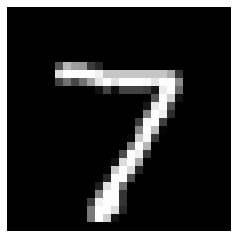

In [22]:
img = mnist.test.images[0].reshape((28, 28))
print(mnist.test.labels[0])
plt.matshow(img, cmap='gray')
plt.xticks([])
plt.yticks([]);

We start an interactive session:

In [4]:
sess = tf.InteractiveSession()

## Build a Softmax Regression model

We start by specifying place holders for the feautres - the pixels - and the labels, `x` and `y_`:

In [25]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
type(x), type(y_)

(tensorflow.python.framework.ops.Tensor,
 tensorflow.python.framework.ops.Tensor)

The Softmax Regression model is a multinomial logistic regression model, described by:
$$
P(y=k|X) = softmax(W_k X + b_k) \\
softmax(z)_j = \frac{e^z_j}{\sum_{I}{e^z_i}}
$$


`W` and `b` are model parameters - `Variable`s.  

In [26]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
type(W), type(b)

(tensorflow.python.ops.variables.Variable,
 tensorflow.python.ops.variables.Variable)

In [27]:
sess.run(tf.initialize_all_variables())

`y` is the predicted value (or more precisely, the predicted probability):

In [28]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
type(y)

tensorflow.python.framework.ops.Tensor

The cost function for softmax regression the the cross entropy function, defined by $-\sum_{k}{y log(y')}$:

In [30]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
type(cross_entropy)

tensorflow.python.framework.ops.Tensor

We use a gradient descent optimizer to minimize the cross entropy:

In [31]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(cross_entropy)

type(optimizer), type(train_step)

(tensorflow.python.training.gradient_descent.GradientDescentOptimizer,
 tensorflow.python.framework.ops.Operation)

We run 1000 steps, each time training on a batch of 50 images (stochastic trainng):

In [32]:
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(
        feed_dict={
            x: batch[0], 
            y_: batch[1]
        }
    )

The actual prediction is decided by taking the most probable class. We compare it to the labels, and measure the model accuracy by the fraction of images that had the right prediction.

In [33]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(
    feed_dict={
        x: mnist.test.images, 
        y_: mnist.test.labels
    }
)
print(acc)

0.9092


A 0.9 accuracy is not that good, we had >0.96 with k-nearest neighboors using scikit-learn.

## Multilayer Convolutional Network

To outperform KNN we will use TensorFlow to build a multilayer convolutional neuron network.

This includes applying convolution filters on the images, polling, and then applying a softmax regression. We also use dropouts to reduce over fitting.

**Note** Fitting this model may take several hours!!

In [34]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [39]:
def conv2d(x, W):
    return tf.nn.conv2d(
        x, 
        filter=W, 
        strides=[1, 1, 1, 1], 
        padding='SAME'
    )

def max_pool_2x2(x):
    return tf.nn.max_pool(
        x, 
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1], 
        padding='SAME'
    )

In [40]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [41]:
x_image = tf.reshape(x, [-1,28,28,1])

In [42]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [43]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [44]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [45]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [46]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [47]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [48]:
sess.run(tf.initialize_all_variables())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(
            feed_dict={
                x:batch[0], 
                y_: batch[1], 
                keep_prob: 1.0
            }
        )
        print("step {:d}, training accuracy {:g}".format(i, train_accuracy))
    train_step.run(
        feed_dict={
            x: batch[0], 
            y_: batch[1], 
            keep_prob: 0.5
        }
    )

acc = accuracy.eval(
    feed_dict={
        x: mnist.test.images, 
        y_: mnist.test.labels, 
        keep_prob: 1.0
    }
)
print("test accuracy {:g}".format(acc))

step 0, training accuracy 0.1
step 100, training accuracy 0.72
step 200, training accuracy 0.9
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.96
step 700, training accuracy 0.94
step 800, training accuracy 0.98
step 900, training accuracy 0.98
step 1000, training accuracy 0.96
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 1
step 1400, training accuracy 0.96
step 1500, training accuracy 0.96
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 0.96
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 1
step 2500, training accuracy 0.94
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98
step 2800, training accuracy 0.96
step 2900, training accuracy 0.98
step 3000, t

# Scikit-flow

https://terrytangyuan.github.io/2016/03/14/scikit-flow-intro/

In [1]:
from sklearn import metrics
import tensorflow as tf
import skflow

In [2]:
# reload the data without the one hot encoding
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Linear classifier

In [64]:
linear_classifier = skflow.TensorFlowLinearClassifier(
    n_classes=10, batch_size=100, steps=1000, learning_rate=0.01)
linear_classifier

TensorFlowLinearClassifier(batch_size=100, class_weight=None,
              config_addon=<skflow.addons.config_addon.ConfigAddon object at 0x7f9655a7bf28>,
              continue_training=False, keep_checkpoint_every_n_hours=10000,
              learning_rate=0.01, max_to_keep=5, n_classes=10,
              optimizer='SGD', steps=1000, tf_master='', tf_random_seed=42,
              verbose=1)

In [ ]:
linear_classifier.fit(mnist.train.images, mnist.train.labels)

In [60]:
prediction = linear_classifier.predict(mnist.test.images)
score = metrics.accuracy_score(mnist.test.labels, prediction)
print('Accuracy: {:f}'.format(score))

Step #99, avg. train loss: 1.91212
Step #199, avg. train loss: 1.36612
Step #299, avg. train loss: 1.10526
Step #399, avg. train loss: 0.95390
Step #499, avg. train loss: 0.85657
Step #600, epoch #1, avg. train loss: 0.78906
Step #700, epoch #1, avg. train loss: 0.73148
Step #800, epoch #1, avg. train loss: 0.70243
Step #900, epoch #1, avg. train loss: 0.65977
Step #1000, epoch #1, avg. train loss: 0.65115
Accuracy: 0.860700


## Convolutional network

In [3]:
def max_pool_2x2(tensor_in):
    return tf.nn.max_pool(tensor_in, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
        padding='SAME')

In [4]:
def conv_model(X, y):
    # reshape X to 4d tensor with 2nd and 3rd dimensions being image width and height
    # final dimension being the number of color channels
    X = tf.reshape(X, [-1, 28, 28, 1])
    # first conv layer will compute 32 features for each 5x5 patch
    with tf.variable_scope('conv_layer1'):
        h_conv1 = skflow.ops.conv2d(X, n_filters=32, filter_shape=[5, 5], 
                                    bias=True, activation=tf.nn.relu)
        h_pool1 = max_pool_2x2(h_conv1)
    # second conv layer will compute 64 features for each 5x5 patch
    with tf.variable_scope('conv_layer2'):
        h_conv2 = skflow.ops.conv2d(h_pool1, n_filters=64, filter_shape=[5, 5], 
                                    bias=True, activation=tf.nn.relu)
        h_pool2 = max_pool_2x2(h_conv2)
        # reshape tensor into a batch of vectors
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
    # densely connected layer with 1024 neurons
    h_fc1 = skflow.ops.dnn(h_pool2_flat, [1024], activation=tf.nn.relu, keep_prob=0.5)
    return skflow.models.logistic_regression(h_fc1, y)

In [5]:
# Training and predicting
cnn_classifier = skflow.TensorFlowEstimator(
    model_fn=conv_model, n_classes=10, batch_size=100, steps=20,
    learning_rate=0.001)

In [6]:
cnn_classifier.fit(mnist.train.images, mnist.train.labels)

TensorFlowEstimator(batch_size=100, class_weight=None,
          config_addon=<skflow.addons.config_addon.ConfigAddon object at 0x7f80d0109f28>,
          continue_training=False, keep_checkpoint_every_n_hours=10000,
          learning_rate=0.001, max_to_keep=5,
          model_fn=<function conv_model at 0x7f80d012ed90>, n_classes=10,
          optimizer='SGD', steps=20, tf_master='', tf_random_seed=42,
          verbose=1)

In [7]:
prediction = cnn_classifier.predict(mnist.test.images)
score = metrics.accuracy_score(mnist.test.labels, prediction)
print('Accuracy: {0:f}'.format(score))

Accuracy: 0.209400
